## BE485/585 Lab 9 -  Ex 2
 In this exercise: <br>
 a) read a BSQ Landasat file  
 b) apply different filtering kernels


In [1]:
# import libraries

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
import viplab_lib3 as vip



In [2]:
#user defined function to apply a filtering kernel to a band 
# the kernel has to be 3x3
def band_filtering(data,fkernel):
    #get size of input band
    nrows,ncols=data.shape
    
    #create empty band
    datares=np.zeros((nrows-3,ncols-3))
    for i in range(0,nrows-3):
        for j in range(0,ncols-3):
            
            value=0
            #loop a 3x3 kernel 
            for r in range(0,3):
                for c in range(0,3):
                    #row and column at original image
                    row=i+r
                    col=j+c
                    
                    valuekernel=fkernel[r,c]
                    value=value+(data[row,col]*valuekernel)
                            

            datares[i,j]=value
    
    return datares

In [3]:
# Starts main program

        
#Load image
filename="./Data/LANDSAT08.A2018261.YUMA.bsq"
nrows=2340
ncols=2848


nbands=6
datatype=np.int16
# bands Name and order
# 0: B2 (Blue)
# 1: B3 (Green)
# 2: B4 (Red)
# 3: B5 (NIR)
# 4: B6 (SWIR1)
# 5: B7 (MIR)


# Read all bands into a single DataCube
print("Reading BSQ ",filename)

dataNIR=vip.BSQ_band_read(filename,3,nrows,ncols)  

# create a subset
# rows: 1591 - 1834
# cols: 1415 - 2010

#bandX=dataNIR[1590:1830,1415:2010]
bandX=dataNIR[1328:1752,630:1190]

Reading BSQ  ./Data/LANDSAT08.A2018261.YUMA.bsq


Processing, it will take a few minutes...


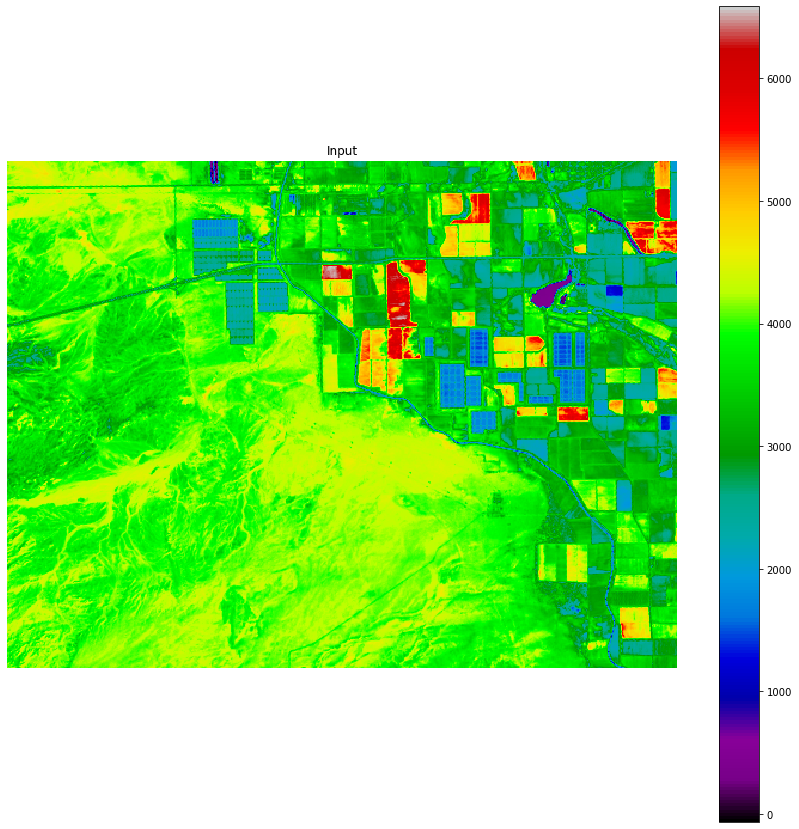

In [4]:
print("Processing, it will take a few minutes...")

plt.figure(figsize=(15,15))
plt.imshow(bandX, cmap='nipy_spectral',interpolation="none" )
plt.axis('off')
plt.title("Input")
plt.colorbar()

## * Sharpen filter

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


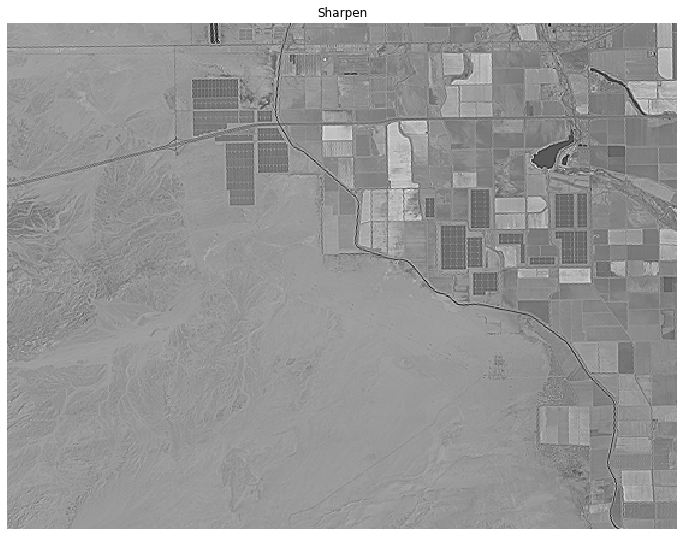

In [5]:
#define the kernel
kernel=np.matrix('0, -1, 0; -1, 5, -1; 0, -1, 0')
#apply the kernel
bandX_filter=band_filtering(bandX,kernel)

#display the result
plt.figure(figsize=(12,12))
plt.imshow(bandX_filter, cmap='gray',interpolation="none" )
plt.title("Sharpen")
plt.axis('off')

print(kernel)

## * blur filter

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


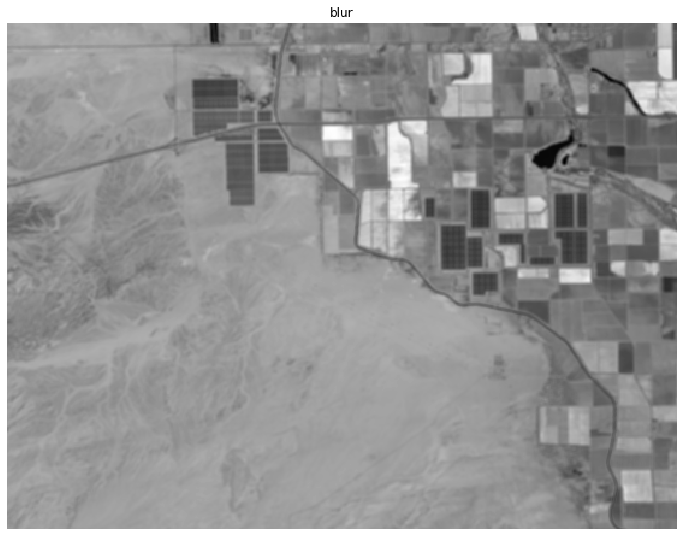

In [6]:
# Apply a 'blur' filter
kernel=np.matrix('1, 1, 1; 1, 1, 1; 1, 1, 1')*1/9
bandX_filter=band_filtering(bandX,kernel)

plt.figure(figsize=(12,12))
plt.imshow(bandX_filter, cmap='gray',interpolation="none" )
plt.title("blur")
plt.axis('off')

print(kernel)

## * emboss filter

[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


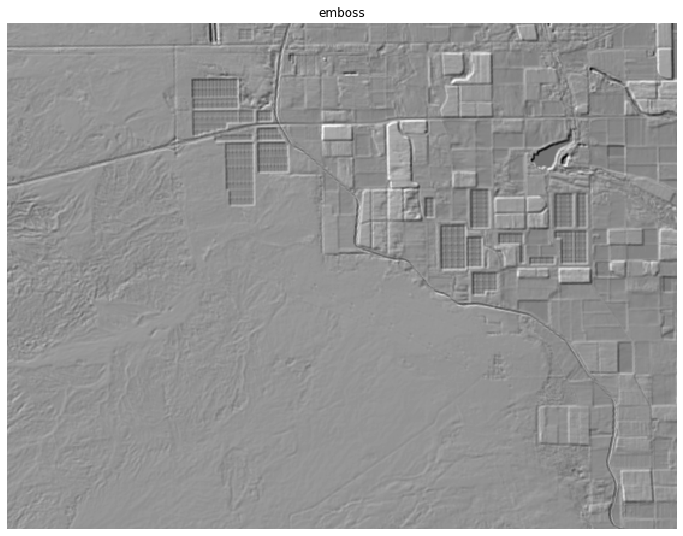

In [7]:
# Apply a 'emboss' filter
kernel=np.matrix('-2, -1, 0; -1, 1, 1; 0, 1, 2')
bandX_filter=band_filtering(bandX,kernel)

plt.figure(figsize=(12,12))
plt.imshow(bandX_filter, cmap='gray',interpolation="none" )
plt.title("emboss")
plt.axis('off')

print(kernel)

## * vertical edges

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


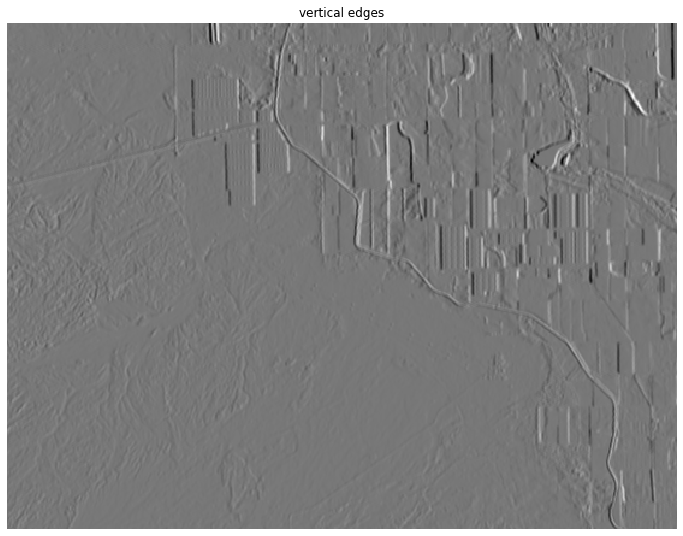

In [8]:
#Apply a 'vertical edge' filter
kernel=np.matrix('-1, 0, 1; -1, 0, 1; -1, 0, 1')
bandX_filter=band_filtering(bandX,kernel)

plt.figure(figsize=(12,12))
plt.imshow(bandX_filter, cmap='gray',interpolation="none" )
plt.title("vertical edges")
plt.axis('off')

print(kernel)

## * horizontal edges

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


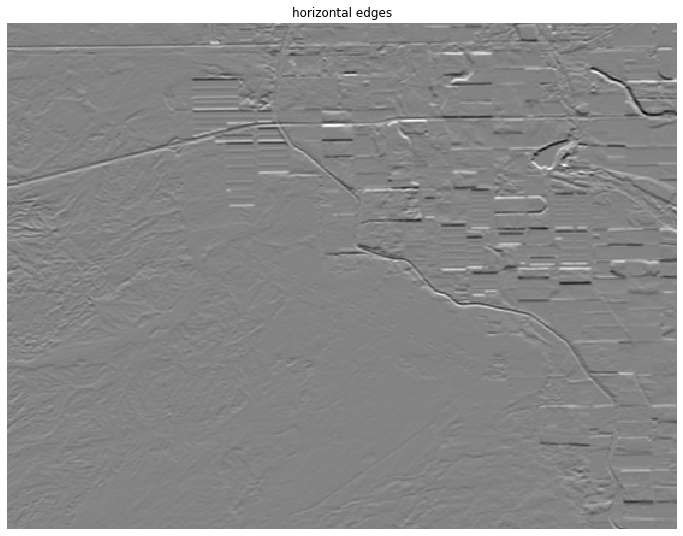

In [9]:
# Apply a 'horizontal edge' filter
kernel=np.matrix('-1, -1, -1; 0, 0, 0; 1, 1, 1')
bandX_filter=band_filtering(bandX,kernel)

plt.figure(figsize=(12,12))
plt.imshow(bandX_filter, cmap='gray',interpolation="none" )
plt.title("horizontal edges")
plt.axis('off')

print(kernel)

#### <font color=red> To Do </font>
1.Create 5x5 kernels and compare against the 3x3 from above
 Look (search the internet) for different (up to 3) kernels and try them
https://en.wikipedia.org/wiki/Kernel_(image_processing)
 Can you explain what these Kernels are actually doing to the data/image and how they help and/or how to take advantage of them

In [ ]:
# Your code here